In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_absolute_error,r2_score
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv("Admission_Predict.csv")
df.shape

(500, 9)

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.drop(columns=['Serial No.'],inplace=True)

In [5]:
df.shape

(500, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
df.columns=df.columns.str.strip()

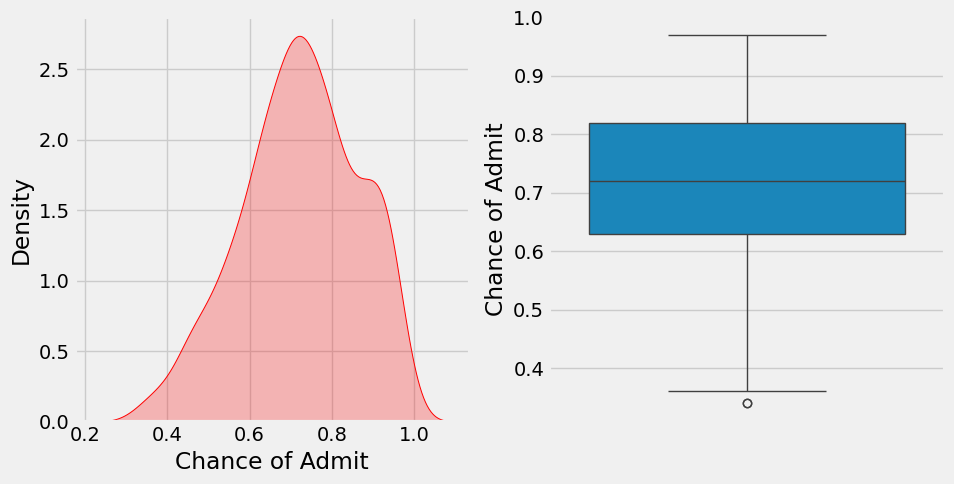

In [9]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.kdeplot(data=df,x='Chance of Admit',fill=True,ax=ax[0],color='red',linewidth=0.7)
sns.boxplot(data=df,y='Chance of Admit',ax=ax[1])

plt.show()

In [10]:
df[df['Chance of Admit']<0.35]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34


In [11]:
test_stats,p_value=shapiro(df['Chance of Admit'])

In [12]:
print(f"The test statistics is {test_stats:.4f} and the p_value is {p_value:.4f}")

The test statistics is 0.9802 and the p_value is 0.0000


In [13]:
if p_value<=0.05:
    print("Reject Null Hypothesis. The data is not normally distributed")
else:
    print("Fail to reject Null Hypothesis. The data is normally distributed")

Reject Null Hypothesis. The data is not normally distributed


In [14]:
X=df.drop(columns=['Chance of Admit'])
Y=df['Chance of Admit']
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [15]:
Y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=10,test_size=0.2)

In [17]:
scaler=MinMaxScaler()

In [18]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [19]:
reg1=TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=PowerTransformer()
)

In [20]:
reg1.fit(X_train_scaled,Y_train)

TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=PowerTransformer())

In [21]:
y_pred_train=reg1.predict(X_train)
y_pred_test=reg1.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [22]:
print(f"The train mean absolute error is:{round(mean_absolute_error(Y_train,y_pred_train),2)}")
print(f"The test mean absolute error is:{round(mean_absolute_error(Y_test,y_pred_test),2)}")

The train mean absolute error is:8.46
The test mean absolute error is:8.46


In [23]:
print(f"The train r2 score is:{round(r2_score(Y_train,y_pred_train),2)}")
print(f"The test r2 score is:{round(r2_score(Y_test,y_pred_test),2)}")

The train r2 score is:-3492.83
The test r2 score is:-4141.85


In [24]:
reg2=TransformedTargetRegressor(
    regressor=RandomForestRegressor(),
    transformer=PowerTransformer()
)

In [25]:
reg2.fit(X_train_scaled,Y_train)

TransformedTargetRegressor(regressor=RandomForestRegressor(),
                           transformer=PowerTransformer())

In [26]:
y_pred_train=reg2.predict(X_train)
y_pred_test=reg2.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [27]:
print(f"The train mean absolute error is:{round(mean_absolute_error(Y_train,y_pred_train),2)}")
print(f"The test mean absolute error is:{round(mean_absolute_error(Y_test,y_pred_test),2)}")

The train mean absolute error is:0.25
The test mean absolute error is:0.23


In [28]:
print(f"The train r2 score is:{round(r2_score(Y_train,y_pred_train),2)}")
print(f"The test r2 score is:{round(r2_score(Y_test,y_pred_test),2)}")

The train r2 score is:-3.05
The test r2 score is:-3.15


In [29]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [30]:
model=Sequential()

In [31]:
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [34]:
model.fit(X_train_scaled,Y_train,validation_split=0.2,epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.7098 - val_loss: 0.5943
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6164 - val_loss: 0.5344
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5626 - val_loss: 0.4825
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5067 - val_loss: 0.4355
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4516 - val_loss: 0.3905
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4184 - val_loss: 0.3432
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3634 - val_loss: 0.2912
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3020 - val_loss: 0.2375
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2452 - val_loss: 0.1863
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1948 - val_loss: 0.1408
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1373 - val_loss: 0.1025
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss

In [35]:
y_pred_test=model.predict(X_test_scaled)
y_pred_train=model.predict(X_train_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [36]:
print(f"The training mean absolute error is:{mean_absolute_error(Y_train,y_pred_train):.3f}")
print(f"The testing mean absolute error is:{mean_absolute_error(Y_test,y_pred_test):.3f}")
print(f"The training r2 score is:{r2_score(Y_train,y_pred_train):.3f}")
print(f"The testing r2 score is:{r2_score(Y_test,y_pred_test):.3f}")

The training mean absolute error is:0.048
The testing mean absolute error is:0.047
The training r2 score is:0.789
The testing r2 score is:0.747
